In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns
from sklearn import neighbors

### Function to plot different element of the papaya example

In [2]:
def plot_papaya_example(plot_train=False, plot_test=False, plot_true_labeling=False, plot_hypothesis_class=False,
                        save_plot=False, data_train=None, data_test=None, plot_color_background=False,
                        true_labeling_limits={'tasty':[[-0.5, 0.5],[-0.5,0.5]], 'out_bound':[[-1,1],[-1,1]]}, 
                        n_hypothesis=None, output_file=None, anchor_legend=(1.5, 0.95)):
    """Plot papaya example.
    
    Parameters
    ----------
    plot_train: bool (optional)
        If True, plot training data. Default is False.
    plot_test: bool (optional)
        If True, plot test data. Default is False.
    plot_true_labeling: bool (optional)
        If True, plot true labeling function. Default is False.
    plot_hypothesis_class: bool (optional)
        If True, plot elements of hypothesis class. Default is False.
    save_plot: bool (optional)
        If True, save figure to file. Default is False.
    plot_color_background: bool (optioanl)
        If True, plot color background to separate tasty/not-tasty.
        Default is False.
    data_train: np.array (optional)
        Training data. Dimension is n_papayas x 2. 
        Columns correspond to [Softness, Color]. 
        Only used if plot_train == True. Default is None.
    data_test: np.array (optional)
        Test data. Dimension is n_papayas x 2. 
        Columns correspond to [Softness, Color]. 
        Only used if plot_test == True. Default is None.
    true_labeling_limits: dict (optional)
        Limits of True labeling function. 
        Keys are ['tasty', 'out_bound']. Values have dimension 2 x 2. 
        [[min_softness, max_softness], [min_color, max_color]].
        Only used if plot_true_labeling == True.
        Default is [[-0.5,0.5],[-0.5,0.5]] for 'tasty'
        and [[-1, 1], [-1, 1]] for 'out_bound'.
    n_hypothesis: int (optional)
        Number of equally spaced hypothesis in hypothesis class.
        Only used if plot_hypothesis_class == True.
        Default is None.
    output_file: str (optional)
        Name of output figure file. 
        Only used if save_plot == True.
        Default is None.
    anchor_legend: tuple (optional)
        Placement of legend. Dimension is 2: (x-axis, y-axis).
        Defautls is (1.5, 0.95).
        
    Returns
    -------
    Plot of papaya tasting example.    
    """

    # set class limits
    if plot_true_labeling:
        xtrain = true_labeling_limits['tasty'][0]
        xtest = true_labeling_limits['out_bound'][0]
        ytrain = true_labeling_limits['tasty'][1]
        ytest = true_labeling_limits['out_bound'][1]

    sns.set(style="ticks")

    fig = plt.figure(figsize=(14,5))
    ax = plt.subplot(111)

    # plot limits of class with colors
    x1 = np.arange(true_labeling_limits['tasty'][0][0], true_labeling_limits['tasty'][0][1], 0.01)
    x2 = np.arange(true_labeling_limits['out_bound'][0][0], true_labeling_limits['out_bound'][0][1], 0.01)

    # plot color background
    if plot_color_background:
        s1 = ax.fill_between(x2, [true_labeling_limits['out_bound'][0][0] for i in range(x2.shape[0])], 
                                 [true_labeling_limits['out_bound'][0][1] for i in range(x2.shape[0])],
                             facecolor='red', alpha=0.1, label='not tasty')
        s2 = ax.fill_between(x1, [true_labeling_limits['tasty'][0][0] for i in range(x1.shape[0])], 
                                 [true_labeling_limits['tasty'][0][1] for i in range(x1.shape[0])],
                             facecolor='blue', alpha=0.1, label='tasty')

    # plot true labeling function
    if plot_true_labeling:
        plt.plot([xtrain[0], xtrain[1]], [ytrain[0], ytrain[0]], color='blue', ls='--', 
                 label='True labelling function')
        plt.plot([xtrain[0], xtrain[0]], [ytrain[0], ytrain[1]], color='blue', ls='--')
        plt.plot([xtrain[0], xtrain[1]], [ytrain[1], ytrain[1]], color='blue', ls='--')
        plt.plot([xtrain[1], xtrain[1]], [ytrain[0], ytrain[1]], color='blue', ls='--')
    
    # plot other elements of hypothesis class  
    if plot_hypothesis_class:
        for j in range(n_hypothesis):
            plt.plot([xtest[0]*(j*0.05), xtest[1]*(j*0.05)], 
                     [ytest[0]*(j*0.05), ytest[0]*(j*0.05)], color='grey', alpha=0.5, ls=':')
            plt.plot([xtest[0]*(j*0.05), xtest[0]*(j*0.05)], 
                     [ytest[0]*(j*0.05), ytest[1]*(j*0.05)], color='grey', alpha=0.5, ls=':')
            plt.plot([xtest[0]*(j*0.05), xtest[1]*(j*0.05)], 
                     [ytest[1]*(j*0.05), ytest[1]*(j*0.05)], color='grey', alpha=0.5, ls=':')
            plt.plot([xtest[1]*(j*0.05), xtest[1]*(j*0.05)], 
                     [ytest[0]*(j*0.05), ytest[1]*(j*0.05)], color='grey', alpha=0.5, ls=':')
            
    if plot_train:
        # get training labels
        train_flag_x = np.logical_and(data_train[:,0] > true_labeling_limits['tasty'][0][0], 
                                      data_train[:,0] < true_labeling_limits['tasty'][0][1])
        train_flag_y = np.logical_and(data_train[:,1] > true_labeling_limits['tasty'][1][0], 
                                      data_train[:,1] < true_labeling_limits['tasty'][1][1])
        train_flag = np.logical_and(train_flag_x, train_flag_y)
        
        plt.scatter(data_train[:,0][train_flag], data_train[:,1][train_flag], marker='o', color='blue')
        plt.scatter(data_train[:,0][~train_flag], data_train[:,1][~train_flag], marker='s', color='red')
        
    if plot_test:
        plt.scatter(data_test[:,0], data_test[:,1], marker='x', color='gray')

    plt.xlabel('Softness', fontsize=22)
    plt.ylabel('Color', fontsize=22)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

    plt.xlim(true_labeling_limits['out_bound'][0][0], true_labeling_limits['out_bound'][0][1])
    plt.ylim(true_labeling_limits['out_bound'][1][0], true_labeling_limits['out_bound'][1][1])
    
    plt.xticks(np.arange(true_labeling_limits['out_bound'][0][0], true_labeling_limits['out_bound'][0][1] + 0.5, 0.5), 
               np.arange(true_labeling_limits['out_bound'][0][0], true_labeling_limits['out_bound'][0][1] + 0.5, 0.5), 
               fontsize=15)
    plt.yticks(np.arange(true_labeling_limits['out_bound'][1][0], true_labeling_limits['out_bound'][1][1] + 0.5, 0.5),
               np.arange(true_labeling_limits['out_bound'][1][0], true_labeling_limits['out_bound'][1][1] + 0.5, 0.5),
               fontsize=15)
    
    if plot_color_background and not plot_hypothesis_class:
        ax.grid(linestyle='--', lw=2)

    ax.legend(bbox_to_anchor=anchor_legend, fontsize=22, frameon=False)
    plt.subplots_adjust(left=0.1, right=0.35, top=0.95, bottom=0.25)
    plt.show()

### Function to determine the minimum number of training necessary

In [3]:
def minimum_training(delta: float, epsilon: float, nhyp: int):
    """Determine minimum number of examples for a PAC learnable model.
    
    Parameters
    ----------
    delta: float
        Confidence over sample representativeness. 
        Must be within [0, 1].
    epsilon: float
        Maximum contamination accepted. Must be within [0, 1].
    nhyp: int
        Number of hypothesis in hypothesis class.
        
    Returns
    -------
    Minimum number of objects required in the training sample.
    """
    
    return (1/epsilon)*np.log(nhyp/delta)

#### Function to construnc training and test data

In [4]:
def build_samples(size_train:int, size_test: int, model:dict):
    """Build training and test samples for the papaya example.
    
    Parameters
    ----------
    size_train: int
        Number of objects in the training sample.
    size_test: int
        Number of objects in the test sample.
    model: dict
        Limits of True labeling function. 
        Keys are ['tasty', 'out_bound']. Values have dimension 2 x 2. 
        [[min_softness, max_softness], [min_color, max_color]].
    
    Returns
    -------
    data_train: np.array
        Training data. Dimension is size_train x 2.
    data_test: np.array
        Test data. Dimension is size_test x 2.
    label_train: list
        Labels for training data. Dimension is size_train.
    label_test: list
        Labels for test data. Dimension is size_test.
    """
    
    # generate training data
    data_train = np.array([[np.random.default_rng().uniform(low=-1, high=1), 
                            np.random.default_rng().uniform(low=-1, high=1)] 
                            for i in range(size_train)])

    # get training labels
    train_flag_x = np.logical_and(data_train[:,0] > model['tasty'][0][0], 
                              data_train[:,0] < model['tasty'][0][1])
    train_flag_y = np.logical_and(data_train[:,1] > model['tasty'][1][0], 
                              data_train[:,1] < model['tasty'][1][1])
    train_flag = np.logical_and(train_flag_x, train_flag_y)
    label_train = train_flag.astype(int)
    
    # generate test data
    data_test = np.array([[np.random.default_rng().uniform(low=-1, high=1), 
                        np.random.default_rng().uniform(low=-1, high=1)] 
                        for i in range(size_test)])

    # get test labels
    test_flag_x = np.logical_and(data_test[:,0] > model['tasty'][0][0], 
                              data_test[:,0] < model['tasty'][0][1])
    test_flag_y = np.logical_and(data_test[:,1] > model['tasty'][1][0], 
                              data_test[:,1] < model['tasty'][1][1])
    test_flag = np.logical_and(test_flag_x, test_flag_y)

    label_test = test_flag.astype(int)
    
    return data_train, data_test, label_train, label_test

#### Function to calculate the success in a given hypothesis class

In [5]:
def pred_hyp(data: np.array, xlim: list, ylim: list):
    """Predict the class of a set of objects given equally spaces axis parallel squares as hypothesis class.
    
    Parameters
    ----------
    data: np.array
        Data whose class will be predicted. Dimensions is n_objects x 2.
    xlim: list
        Limits on softeness. Dimension is 2.
    ylim: list
        Limits on color. Dimension is 2.
        
    Returns
    -------
    prediction: np.array
        Predicted class for each object in data test.
    """ 
    # get flags for tasty objects as True, not tasty as False
    xlim_flag = np.logical_and(data[:,0] > xlim[0], data[:,0] < xlim[1])
    ylim_flag = np.logical_and(data[:,1] > ylim[0], data[:,1] < ylim[1])
    label_flag = np.logical_and(xlim_flag, ylim_flag)
    
    prediction = label_flag.astype(int)
    
    return prediction

#### Function to calculate Empirical Risk Minimization (ERM) given a hypothesis class and data set

In [6]:
def ERM(data: np.array, label: np.array, xlim: list, ylim: list):
    """Calculates Empirical Risk Minimization for a given model and data.
    
    Parameters
    ----------
    ----------
    data: np.array
        Data whose class will be predicted. Dimensions is n_objects x 2.
    label: np.array
        Labels for training data. 1 is tasty, 0 is not tasty.
    xlim: list
        Limits on softeness. Dimension is 2.
    ylim: list
        Limits on color. Dimension is 2.
        
    Returns
    -------
    Number of wrong predictions
    """
    
    # calculate predictions
    predictions = pred_hyp(data, xlim=xlim, ylim=ylim)        
    
    # calculate accuracy
    results_flag = predictions == label
    
    return sum(~results_flag)

#### Function to choose best hypothesis

In [7]:
def ERM_score(data_train: np.array, label_train: np.array, data_test: np.array, label_test:np.array, 
             hypothesis_class: list):
    """Calculates best ERM score on test data given train data and hypothesis class.
    
    Parameters
    ----------
    data_train: np.array
        Training data. Dimension is size_train x 2.
    data_test: np.array
        Test data. Dimension is size_test x 2.
    label_train: list
        Labels for training data. Dimension is size_train.
    label_test: list
        Labels for test data. Dimension is size_test.
    hypothesis_class: list
        Set of softness and color limits for each hypothesis
        in the hypothesis class.
        
    Returns
    -------
    score: float
        Number of correct predictions for test data considering hypothesis
        with minimum empirical risk.
    best_hypothesis_indx: int
        Index of best performing hypothesis.
    """
    
    # store results
    results = []
    
    # calculate predictions for each hypothesis
    for hypothesis in hypothesis_class:
        
        score_hyp = ERM(data=data_train, label=label_train, xlim=hypothesis[0], ylim=hypothesis[1])
        results.append(score_hyp)

    # get mininum ER
    best_results = min(results)
    best_flag = np.array(results) == best_results
    indx_min = results.index(min(results))   

    score = ERM(data_test, label=label_test, xlim=hypothesis_class[indx_min][0], 
                ylim=hypothesis_class[indx_min][1])
    
    return score, np.arange(len(hypothesis_class))[best_flag]

# Construct environment for papaya example

In [8]:
# Determine true labeling function
model = {}

# limits on softness and color (in this order)
model['tasty'] = [[-0.5, 0.5], [-0.5, 0.5]]

# limits on outter bounds of the model in softness and color (in this order)
model['out_bound'] = [[-1, 1], [-1, 1]]

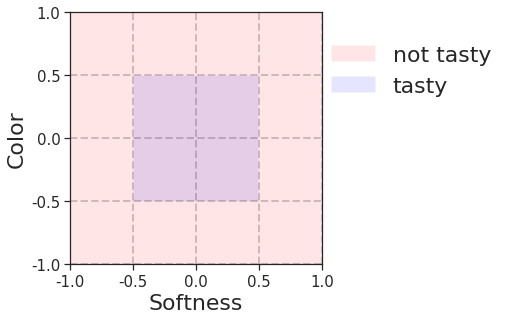

In [9]:
plot_papaya_example(plot_color_background=True,
                    true_labeling_limits=model, anchor_legend=(1.75, 0.95))

# Build hypothesis class

In [10]:
# set number of hypothesis
n_hypothesis = 20

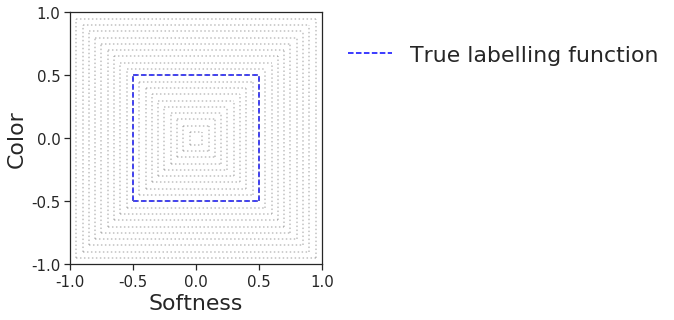

In [11]:
### Plot hypothesis class
plot_papaya_example(plot_train=False, plot_test=False, plot_true_labeling=True, plot_hypothesis_class=True,
                    plot_color_background=False, true_labeling_limits=model, 
                    n_hypothesis=n_hypothesis, anchor_legend=(1.025, 0.95))

# Calculate minimum training

In [12]:
epsilon = 0.05        # contamination
delta = 0.05          # confidence in the representativeness of training sample

required_training = minimum_training(delta=delta, epsilon=epsilon, nhyp=n_hypothesis)

print('Minimum required training: ', required_training)

Minimum required training:  119.82929094215963


# Train a machine learning model in current example

#### Generate training sample

In [13]:
# determine size of training sample
size_training = 10

# get training data
data_train = np.array([[np.random.default_rng().uniform(low=-1, high=1), 
                        np.random.default_rng().uniform(low=-1, high=1)] 
                        for i in range(size_training)])

# get training labels
train_flag_x = np.logical_and(data_train[:,0] > model['tasty'][0][0], 
                              data_train[:,0] < model['tasty'][0][1])
train_flag_y = np.logical_and(data_train[:,1] > model['tasty'][1][0], 
                              data_train[:,1] < model['tasty'][1][1])
train_flag = np.logical_and(train_flag_x, train_flag_y)

train_labels = train_flag.astype(int)

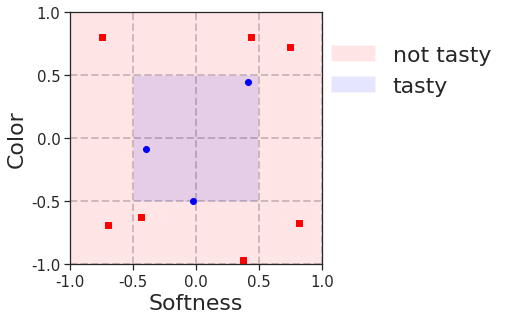

In [14]:
# plot training
plot_papaya_example(plot_train=True, data_train=data_train, plot_color_background=True,
                        true_labeling_limits=model, anchor_legend=(1.75, 0.95))

#### Generate a test sample

In [15]:
# determine size of test sample
size_test = 100

# get test data
data_test = np.array([[np.random.default_rng().uniform(low=-1, high=1), 
                        np.random.default_rng().uniform(low=-1, high=1)] 
                        for i in range(size_test)])

# get test labels
test_flag_x = np.logical_and(data_test[:,0] > model['tasty'][0][0], 
                              data_test[:,0] < model['tasty'][0][1])
test_flag_y = np.logical_and(data_test[:,1] > model['tasty'][1][0], 
                              data_test[:,1] < model['tasty'][1][1])
test_flag = np.logical_and(test_flag_x, test_flag_y)

test_labels = test_flag.astype(int)

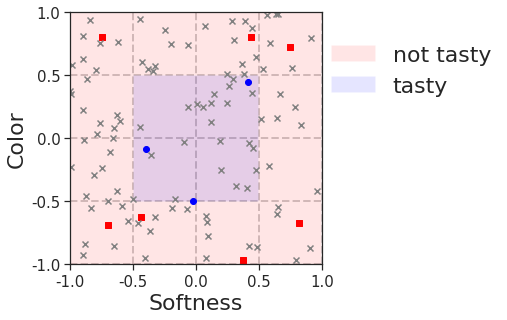

In [16]:
# plot train and test
plot_papaya_example(plot_train=True, plot_test=True, data_train=data_train, data_test=data_test, 
                    plot_color_background=True,
                    true_labeling_limits=model, anchor_legend=(1.75, 0.95))

# Calculate the success given the hypothesis in our hypothesis class

In [17]:
# set number of hypothesis in hypothesis class
nhypothesis = 20
step = 1.0 / nhypothesis

# build hypothesis class
hypothesis_class =[[[-(1 - i * step), (1 - i * step)],[-(1 - i * step), (1 - i * step)],
                     [[-(1 - i * step), (1 - i * step)],[-(1 - i * step), (1 - i * step)]]]
                    for i in range(1, int(nhypothesis))]


# build true labeling function
model = {}
model['out_bound'] = [[-1, 1], [-1, 1]]
model['tasty'] = [[-0.5, 0.5],[-0.5, 0.5]]

# set of training sample sizes to test
train_sets = np.arange(5, 130, 5)

# number of objects in the test sample
ntest = 100
i=0

# number of experiments
n_experiments = 100

# store results
results = []

for i in range(len(train_sets)):
    # run many experiments
    results_train = []
    
    
    for n in range(n_experiments):
        # build data set
        data_train2, data_test2, label_train2, label_test2 = \
                              build_samples(size_train=train_sets[i], size_test=ntest, 
                                                                       model=model)

        score, indx = ERM_score(data_train=data_train2, label_train=label_train2, data_test=data_test2, 
                            label_test=label_test2, hypothesis_class=hypothesis_class)
    
        results_train.append([score, len(indx)])
        
    results.append(results_train)

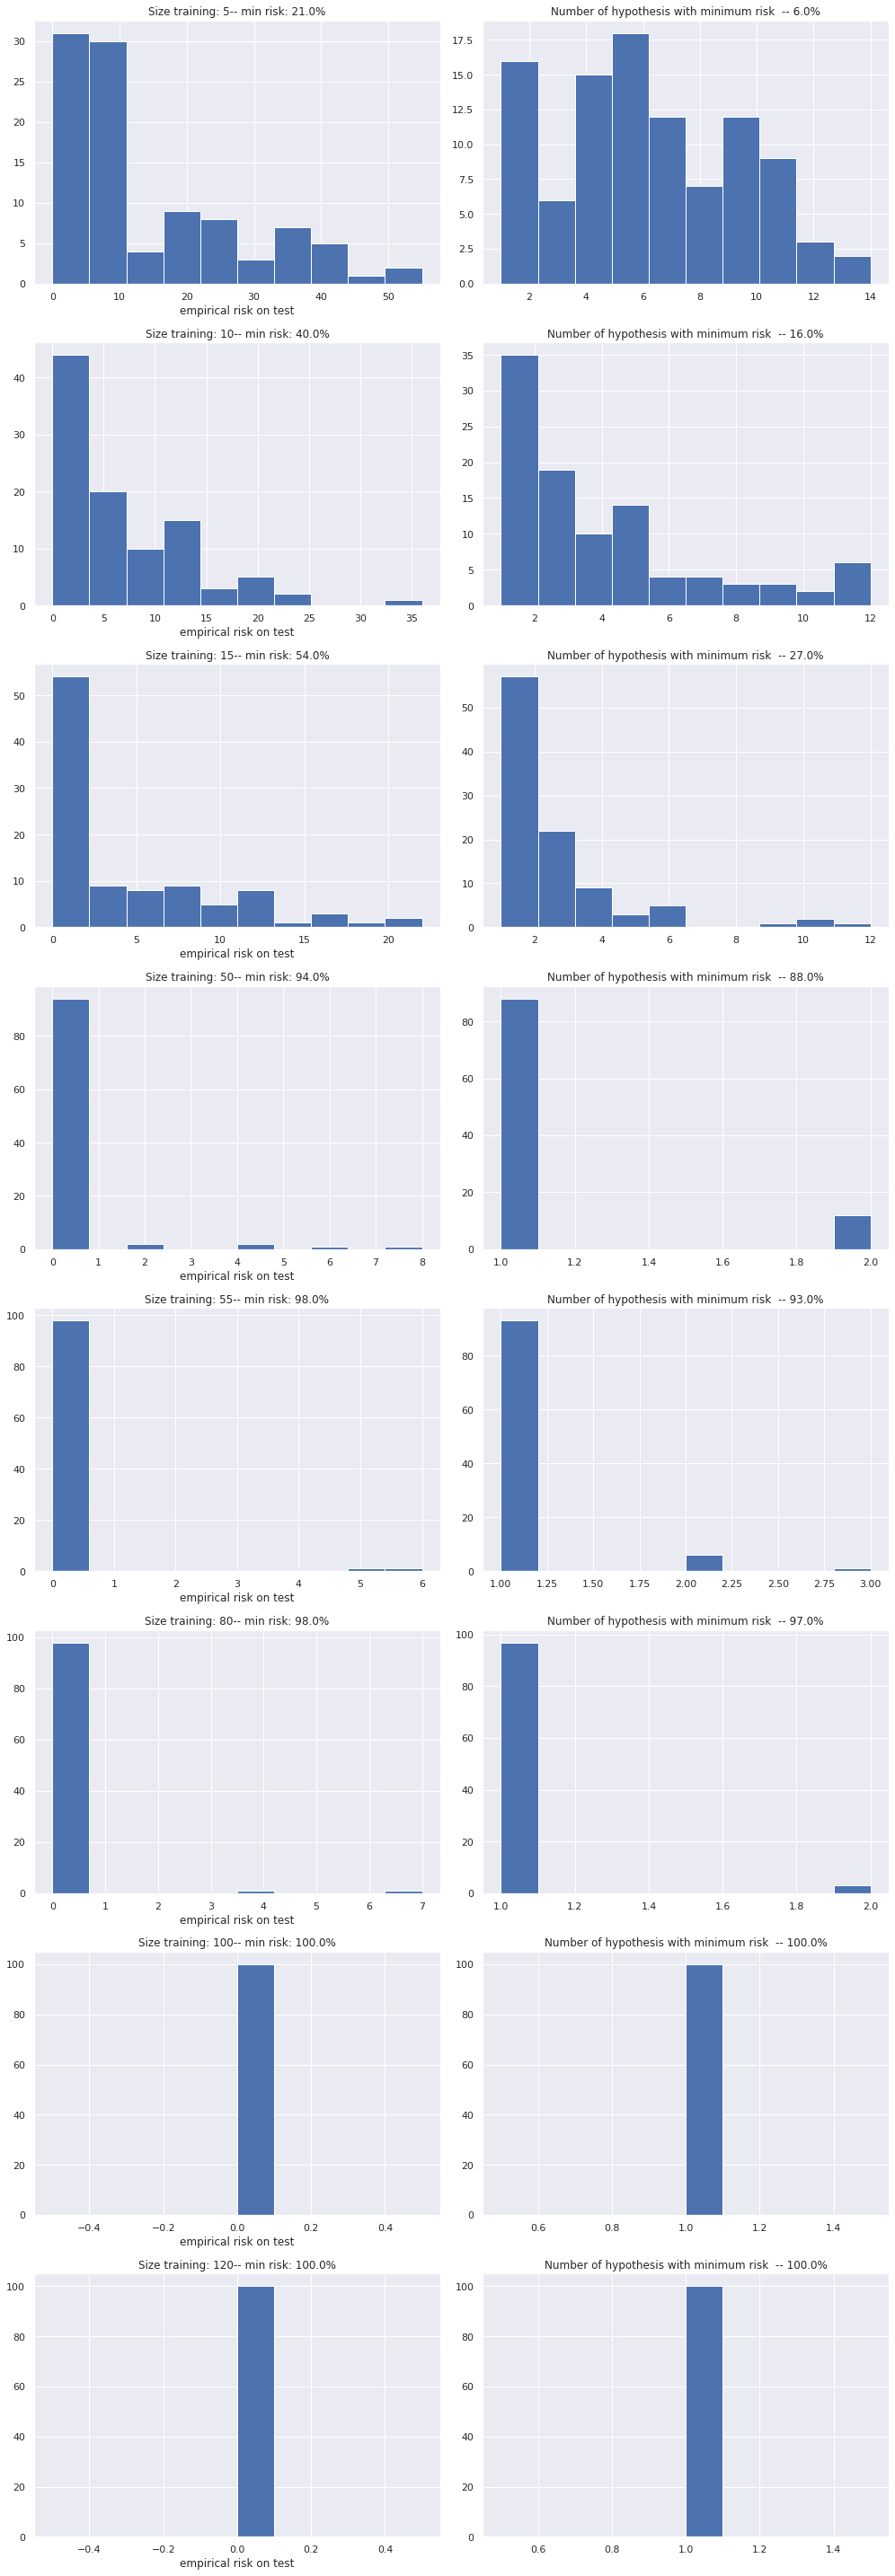

In [18]:
sns.set()

plot_sets = [0, 1, 2, 9, 10, 15, 19, 23]

plt.figure(figsize=(14, len(plot_sets)*5))

for j in range(len(plot_sets)):

    flag1 = np.array(results[plot_sets[j]])[:,0] == 0

    plt.subplot(len(plot_sets), 2, 2 *j + 1)
    plt.title('Size training: ' + str(train_sets[plot_sets[j]]) + '-- min risk: ' + \
              str(round(sum(flag1)/n_experiments * 100)) + '%')
    plt.hist(np.array(results[plot_sets[j]])[:,0])
    plt.xlabel('empirical risk on test')

    flag2 = np.array(results[plot_sets[j]])[:,1] == 1
    plt.subplot(len(plot_sets), 2, 2 *j + 2)
    plt.title('Number of hypothesis with minimum risk ' + ' -- ' + str(round(sum(flag2)/n_experiments * 100)) + '%')
    plt.hist(np.array(results[plot_sets[j]])[:,1])

plt.tight_layout()
plt.show()

#### Train a k Nearest Neigbor algorithm

In [19]:
# determine number of neighbors
nneighbors = 3

# train machine learning model
nbrs =  neighbors.KNeighborsClassifier(n_neighbors=nneighbors).fit(data_train, train_labels)

# estimate classes
est_classes = nbrs.predict(data_test)

# calculate accuracy
score = nbrs.score(data_test, test_labels)

print('Mean accuracy: ', score)

Mean accuracy:  0.85


# Repeat the experiment many times to estimate the confidence and contamination

In [21]:
# Determine true labeling function
model = {}
model['tasty'] = [[-0.5, 0.5], [-0.5, 0.5]]
model['out_bound'] = [[-1, 1], [-1, 1]]

# set of training sample sizes to test
train_sets = np.arange(10, 160, 10)

# number of objects in the test sample
ntest = 100

# number of experiments to perform
n_experiments = 100

# store accuracy results
all_scores = []

for ntrain in train_sets:
    
    # store scores for this training size
    set_scores = []
    
    j = list(train_sets).index(ntrain)
    
    nneighbors = [2,3,4,5,10]
    
    for i in range(n_experiments):
        # generate data
        data_train, data_test, label_train, label_test = \
                              build_samples(size_train=ntrain, size_test=ntest, model=model)

        nn_scores = []
        
        # train machine learning model
        for n in nneighbors:
            nbrs =  neighbors.KNeighborsClassifier(n_neighbors=n).fit(data_train, label_train)
            score_train = nbrs.score(data_train, label_train)
            nn_scores.append(score_train)
            
        max_score = max(nn_scores)
        indx = nn_scores.index(max_score)
        flag_max_scores = np.array(nn_scores) == max_score
        

        # calculate accuracy of best model
        nbrs_best =  neighbors.KNeighborsClassifier(n_neighbors=nneighbors[indx]).fit(data_train, label_train)
        score = nbrs_best.score(data_test, label_test)
    
        # store results
        set_scores.append([score, sum(flag_max_scores)])
        
    all_scores.append(np.array(set_scores))
    
all_scores = np.array(all_scores)

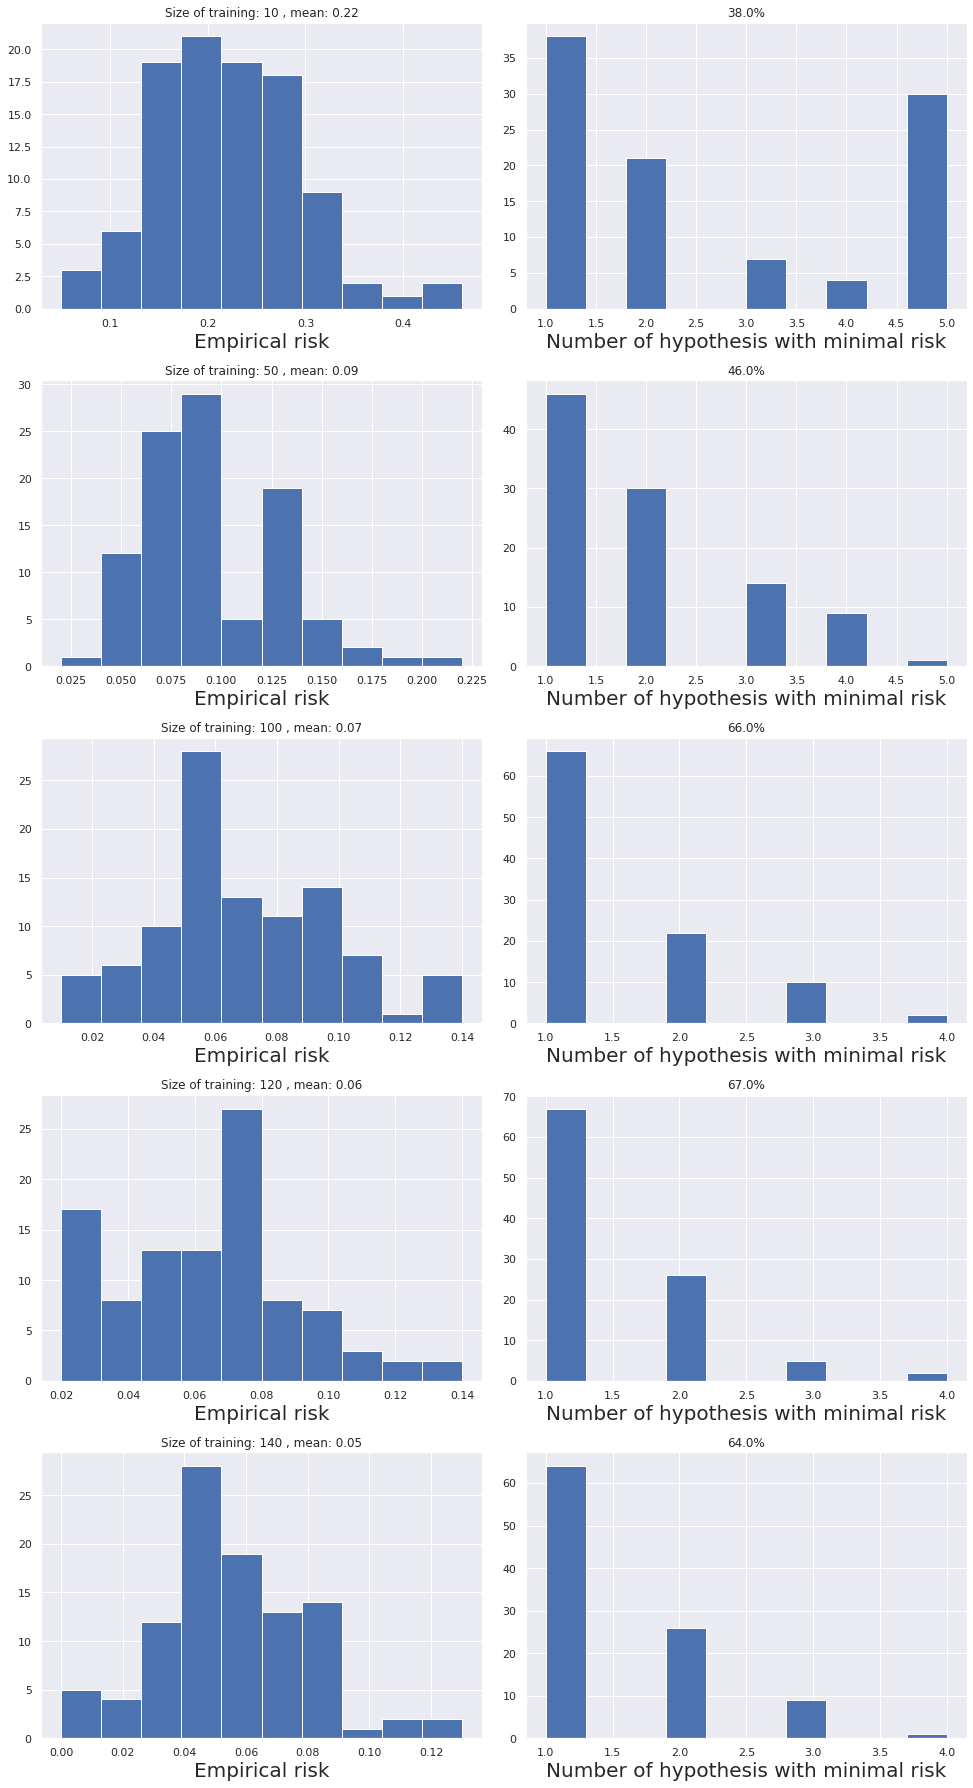

In [22]:
# plot results
sns.set()

nneighbors_p = [0, 4, 9, 11, 13]

plot_nn = [0, 1, 2, 3, 4]
                              
plt.figure(figsize=(7 * 2, 5 * len(plot_nn)))
           
for j in range(len(nneighbors_p)):

    score_mean = 1 - np.mean(all_scores[nneighbors_p[j]][:,0])

    plt.subplot(len(plot_nn),2, j*2 + 1)
    plt.title('Size of training: ' + str(train_sets[nneighbors_p[j]]) + ' , mean: ' + str(round(score_mean, 2)))
    plt.hist(1-all_scores[nneighbors_p[j]][:,0])
    plt.xlabel('Empirical risk', fontsize=20)

    flag3 = all_scores[nneighbors_p[j]][:,1] == 1
    plt.subplot(len(plot_nn),2, j*2 + 2)
    plt.title(str(round(100 * sum(flag3)/n_experiments)) + '%')
    plt.hist(all_scores[nneighbors_p[j]][:,1])
    plt.xlabel('Number of hypothesis with minimal risk', fontsize=20)

plt.tight_layout()
plt.show()